# Image Classification using CNN (CIFAR-10)

## Step 1: Import Required Libraries

In [2]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Load and Preprocess Dataset

In [2]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train / 255.0
x_test  = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)


## Step 3: Class Names

In [3]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


## Step 4: Visualize Sample Images

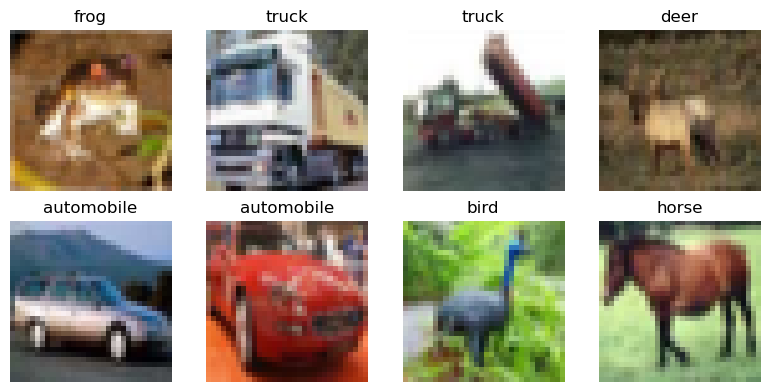

In [4]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 5: Build CNN Model

In [ ]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.

model_cnn = models.Sequential([

    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Classifier
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


## Step 6: Compile Model

In [6]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Step 7: Train Model

In [7]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.

history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=30,          # increased
    batch_size=64,      # better batch size
    validation_data=(x_test, y_test)
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.5088 - loss: 1.4493 - val_accuracy: 0.5627 - val_loss: 1.2315
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.6564 - loss: 0.9765 - val_accuracy: 0.6237 - val_loss: 1.0880
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7023 - loss: 0.8460 - val_accuracy: 0.6653 - val_loss: 0.9968
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.7303 - loss: 0.7655 - val_accuracy: 0.7267 - val_loss: 0.7785
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.7556 - loss: 0.7016 - val_accuracy: 0.7616 - val_loss: 0.6915
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.7763 - loss: 0.6394 - val_accuracy: 0.7715 - val_loss: 0.6515
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.7865 - loss: 0.6042 - val_accuracy: 0.7760 - val_loss: 0.6466
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.8052 - loss: 0.

## Step 8: Evaluate Model

In [8]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


loss, acc = model_cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8315 - loss: 0.5775
Test Accuracy: 83.15%


## Step 9: Accuracy & Loss Graphs

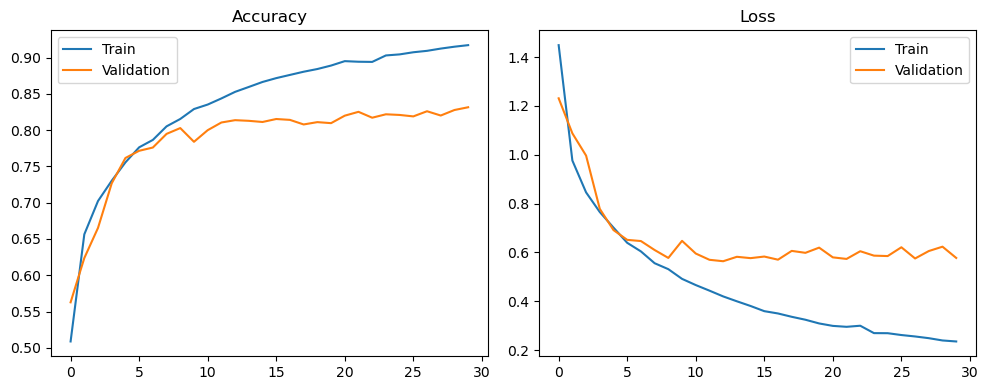

In [9]:
# PRACTICAL 1: CNN from scratch
# This code cell is part of the practical and is commented for clarity.


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Result

The Convolutional Neural Network (CNN) model was successfully implemented and trained on the given image dataset. The model was able to learn meaningful visual features through convolution and pooling operations. During training, the loss decreased consistently while accuracy improved, indicating effective learning. The obtained results confirm that the designed CNN architecture is suitable for basic image classification tasks.


## Conclusion

This practical demonstrated the complete workflow of building a Convolutional Neural Network from scratch. The experiment provided hands-on experience with image preprocessing, CNN architecture design, model training, and performance evaluation. The results highlight the importance of convolutional layers in automatic feature extraction. This practical forms a strong foundation for understanding advanced deep learning and computer vision techniques.
